# 2D convolutions

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import scipy
from scipy import signal
from scipy import linalg
import time

Consider a 2D signal $\mathbf{v}$ representing a picture

((372, 497),
 array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        ...,
        [0.6       , 0.59705883, 0.57058823, ..., 0.56470585, 0.5676471 ,
         0.5676471 ],
        [0.59705883, 0.59411764, 0.5617647 , ..., 0.57058823, 0.56470585,
         0.5676471 ],
        [0.59411764, 0.5911765 , 0.5441177 , ..., 0.57058823, 0.5735294 ,
         0.57058823]], dtype=float32))

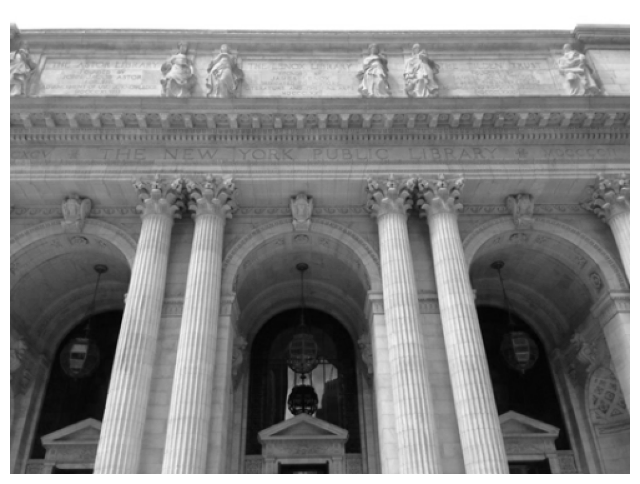

In [52]:
# write here the import path of the image
image_path = '/Users/davide/Desktop/Università/Magistrale - PoliMi/Anno 1 - 2023:2024/Semestre 1/Numerical Analysis/Laboratory/Lab 5/NYlibrary.png'

v = np.mean(imread(image_path), axis = 2)

plt.rcParams['figure.figsize'] = [8, 8]

vmin = v.min()
vmax = v.max()
img = plt.imshow(v, cmap='gray', vmin = vmin, vmax = vmax)
plt.axis('off')
v.shape, v

Consider the following kernels

In [53]:
kernel_blur1 = np.array([[ 1,  2,  1],
                         [ 2,  4,  2],
                         [ 1,  2,  1]])
kernel_blur1 = kernel_blur1 / np.sum(kernel_blur1)

kernel_blur2 = np.ones((10,10)) / 100

kernel_edge1 = np.array([[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]])
kernel_edge2 = np.array([[ 0, -1,  0],
                         [-1,  4, -1],
                         [ 0, -1,  0]])
kernel_edge3 = np.array([[ 1,  0, -1],
                         [ 0,  0,  0],
                         [-1,  0,  1]])

kernel_sobel_horizontal = np.array([[ 1,  2,  1],
                                    [ 0,  0,  0],
                                    [-1, -2, -1]])
kernel_sobel_vertical = np.array([[ 1,  0, -1],
                                  [ 2,  0, -2],
                                  [ 1,  0, -1]])

kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

kernel_drunk = np.random.randn(50,50)

Choose here the desired filter $\mathbf{k}$

In [54]:
k = kernel_blur1

In what follows, we will compute the convolution between $\mathbf{v}$ and $\mathbf{k}$ in 3 different manners. At the end of each point, plot the obtained filtered (i.e. convolved) signal.

## 1. Direct definition (sums of products)

Convolution without "boundary layers"

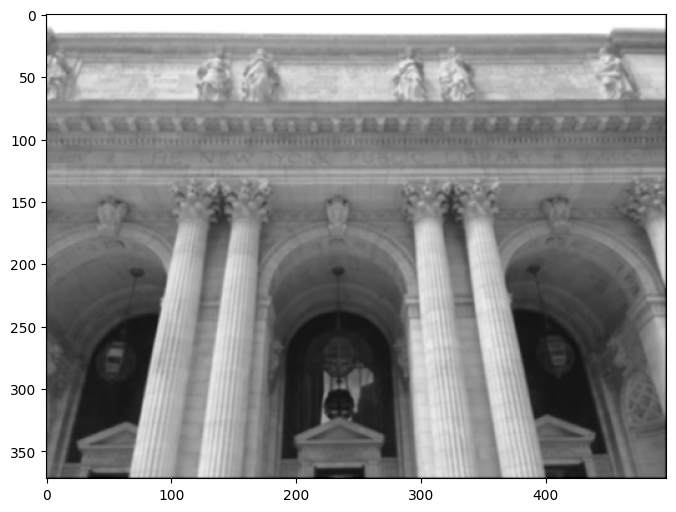

In [55]:
def is_valid(mat, i, j):
    if i < 0 or j < 0:
        return False
    if i >= len(mat) or j >= len(mat[i]):
        return False
    return  True

def convolve(mat, kernel): # kernel è una matrice quadrata NxN con N dispari, tipicamente 3x3
    res = mat.copy()
    delta = len(kernel) // 2

    for i in range(len(mat)):
        for j in range(len(mat[i])):
            tot = 0
            for x in range(-delta, delta + 1):
                for y in range(-delta, delta + 1):
                    if not is_valid(mat, i + x, j + y):
                        continue
                    tot += mat[i + x][j + y] * kernel[x + delta][y + delta]
            res[i][j] = max(0, tot)
    return res

plt.imshow(convolve(v, k), cmap='gray')

## 2. Convolution through DFT

Besides the filtered image, plot the DFT of the original image, of the kernel and of the filtered image.

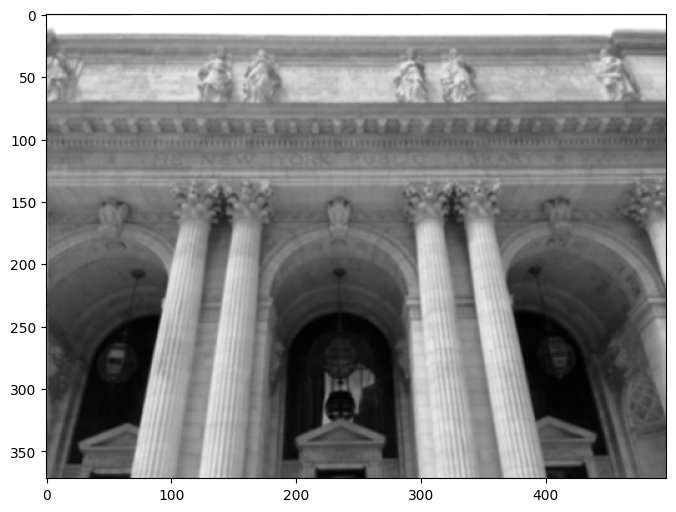

In [56]:
# fft2 --> è la versione 2d di fft, stessa cosa per ifft2
v_f = np.fft.fft2(v)
k_f = np.fft.fft2(k, v.shape) # automatic padding

conv = np.real(np.fft.ifft2(np.multiply(v_f, k_f)))
plt.imshow(conv, cmap='gray')

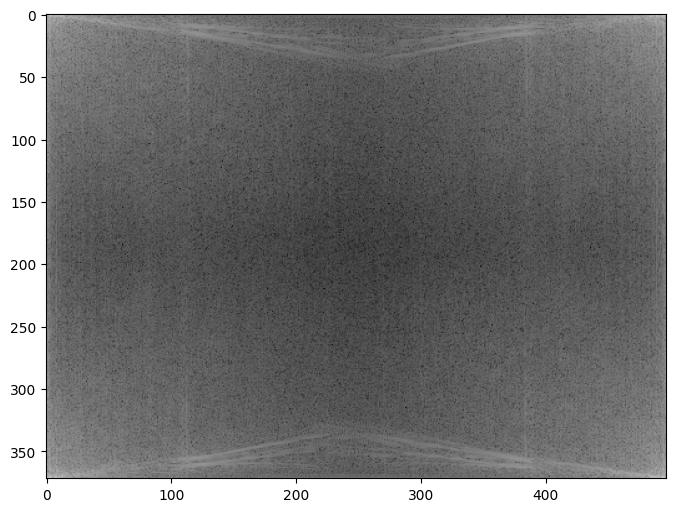

In [57]:
plt.imshow(np.log10(np.absolute(v_f)), cmap='gray') # log10 of the module of the complex number of the DFT

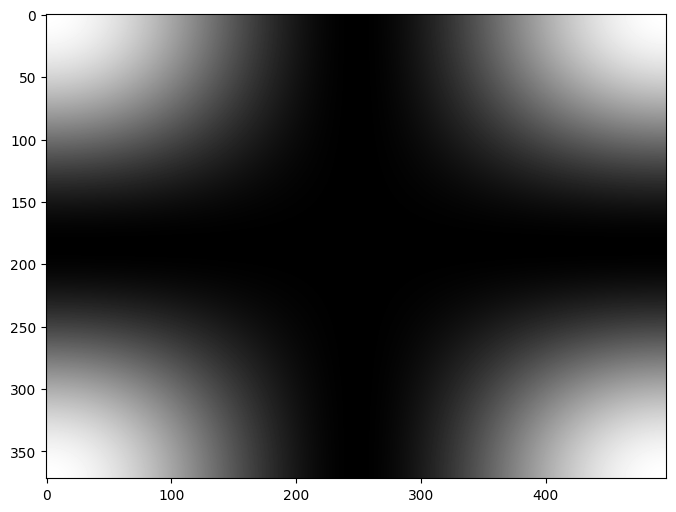

In [58]:
plt.imshow(np.absolute(k_f), cmap='gray')

/var/folders/_v/q6j8tl0d2cb93y5h0_d24pgr0000gn/T/ipykernel_8457/1812977203.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.absolute(np.multiply(v_f, k_f))), cmap="gray")


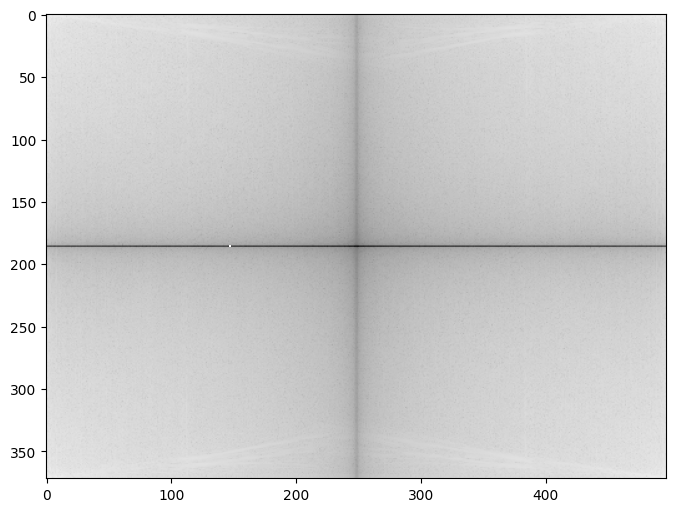

In [59]:
plt.imshow(np.log10(np.absolute(np.multiply(v_f, k_f))), cmap="gray")

## 3. Using the command `scipy.signal.convolve`

Check out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).

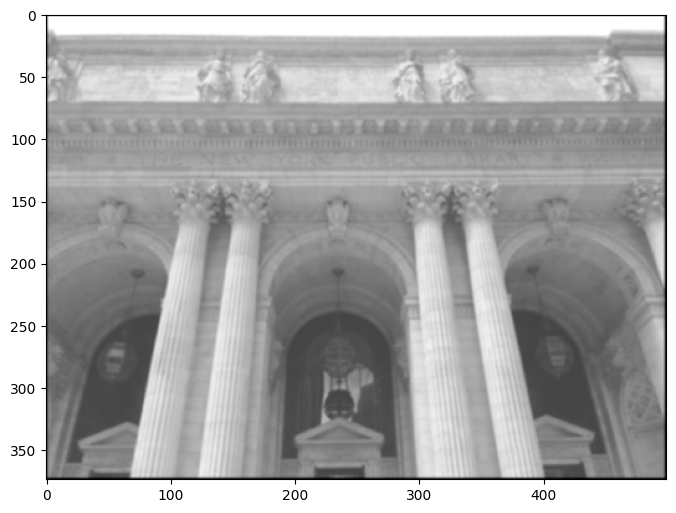

In [60]:
plt.imshow(scipy.signal.convolve2d(v , k , 'full'), cmap='gray')

In [61]:
# you can't use toeplitz matrix and circulant matrix for the 2-dimensional case --> still DFT is the best option
# look at the DFT filter for each kernel (and image) --> very interesting feature, typical use in CNN
# the most practical way of doing convolution is using signal.convolve() from scipy and jax.scipy